In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clicks-conversion-tracking/KAG_conversion_data.csv


In [2]:
df = pd.read_csv('/kaggle/input/clicks-conversion-tracking/KAG_conversion_data.csv')

In [3]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


DATA EXPLORATION

we would drop all three id since they dont affect our conclusion


In [4]:
df = df.drop(['ad_id','xyz_campaign_id','fb_campaign_id'],axis=1)

In [5]:
df.head(3)

,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,30-34,M,15,7350,1,1.43,2,1
1,30-34,M,16,17861,2,1.82,2,0
2,30-34,M,20,693,0,0.00,1,0


In [6]:
df['Approved_Conversion'].value_counts()

0     559
1     403
2      86
3      35
4      24
6       7
5       7
8       5
10      4
7       4
9       3
14      2
21      1
17      1
13      1
12      1
Name: Approved_Conversion, dtype: int64

In [7]:
df['gender'].value_counts()

M    592
F    551
Name: gender, dtype: int64

In [8]:
df['age'].value_counts()

30-34    426
45-49    259
35-39    248
40-44    210
Name: age, dtype: int64

These two were Categorical Values so we also would hace to change both in numerical form

SOME DATA VISUALISATION

In [9]:
import seaborn as sns

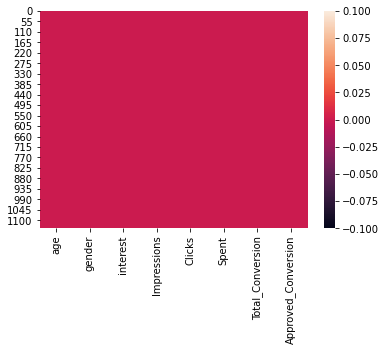

In [10]:
#check if we have empty values or not
sns.heatmap(df.isnull())

we have no missing values

In [11]:
import seaborn as sns

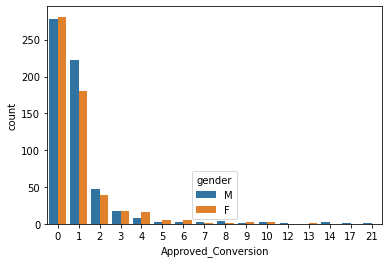

In [12]:
sns.countplot(x='Approved_Conversion',hue='gender',data=df)

it is quite evident that more men have bought the product  after seeing the ad so a man buying the product after ad is more probable than a woman 

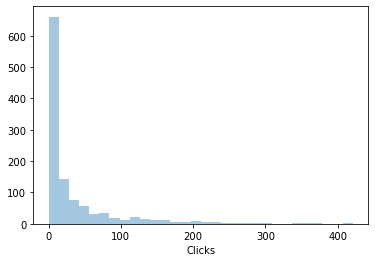

In [13]:
sns.distplot(df['Clicks'],kde=False,bins=30)

So total clicks on the ad lie mostly in range 0-10 

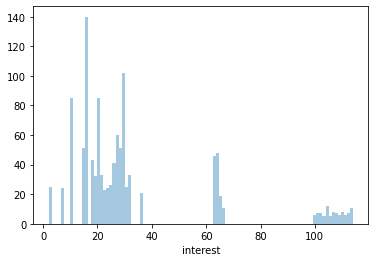

In [14]:
sns.distplot(df['interest'],kde=False,bins=100)

SO here interest of different people are encoded with a number and majority of people are interested in object which is encoded by number 140 

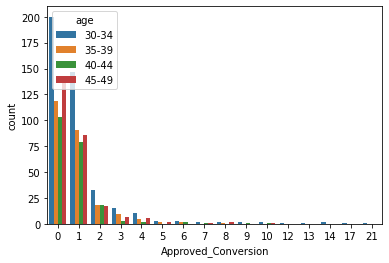

In [15]:
sns.countplot(x='Approved_Conversion',hue='age',data=df)

Intersting fact , most people have only bought the product only once and also most of the people who buy it lie in the range of 30-34 

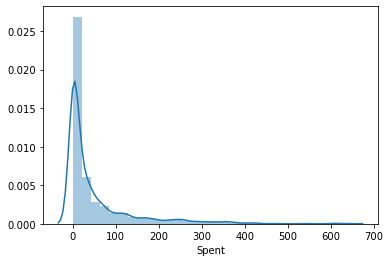

In [16]:
sns.distplot(df['Spent'],bins=30)

So amounts pad by most of the companies are aroun 0-10

DATA MANIPUALTION

In [17]:
df['gender'].value_counts()

M    592
F    551
Name: gender, dtype: int64

In [18]:
df = df.replace('M',1)
df = df.replace('F',0)

In [19]:
df['age'].value_counts()

30-34    426
45-49    259
35-39    248
40-44    210
Name: age, dtype: int64

In [20]:
df = df.replace('30-34',0.0011)
df = df.replace('35-39',0.0012)
df = df.replace('40-44',0.0013)
df = df.replace('45-49',0.0014)


In [21]:
df.head()

,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,0.0011,1,15,7350,1,1.43,2,1
1,0.0011,1,16,17861,2,1.82,2,0
2,0.0011,1,20,693,0,0.00,1,0
3,0.0011,1,28,4259,1,1.25,1,0
4,0.0011,1,28,4133,1,1.29,1,1


# APPLYING DIFFERENT ALGORITHMS 

In [22]:
df.columns

Index(['age', 'gender', 'interest', 'Impressions', 'Clicks', 'Spent',
       'Total_Conversion', 'Approved_Conversion'],
      dtype='object')

In [23]:
x = df[['age', 'gender', 'interest', 'Impressions', 'Clicks', 'Spent',
       'Total_Conversion']]
y = df['Approved_Conversion']

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [25]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train,y_train)
linear.score(x_test,y_test)

0.7468854474221611

In [26]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(x_train,y_train)
tree.score(x_test,y_test)

0.3801318549595445

In [27]:
from sklearn.linear_model import Ridge
rid = Ridge(alpha=1)
rid.fit(x_train,y_train)
rid.score(x_test,y_test)

0.7469158369764428

In [28]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train,y_train)
forest.score(x_test,y_test)


0.6991535510937967

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
boost = GradientBoostingRegressor()
boost.fit(x_train,y_train)
boost.score(x_test,y_test)

0.6634911979747677

In [30]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
ada.score(x_test,y_test)

0.6368327456370826

FEATURE IMPORTANCES

In [31]:
ada.feature_importances_

array([0.00723452, 0.01446625, 0.04537639, 0.07859624, 0.02696176,
       0.03328994, 0.7940749 ])

In [32]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(forest, x_train, y_train):
    return r2_score(y_train, forest.predict(x_train))

perm_imp_rfpimp = permutation_importances(forest, x_train, y_train, r2)

ModuleNotFoundError: No module named 'rfpimp'

In [33]:
perm_imp_rfpimp

NameError: name 'perm_imp_rfpimp' is not defined

In [34]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(linear, x_train, y_train):
    return r2_score(y_train, linear.predict(x_train))

perm_imp_rfpimp_linear = permutation_importances(linear, x_train, y_train, r2)

ModuleNotFoundError: No module named 'rfpimp'

In [35]:
perm_imp_rfpimp_linear

NameError: name 'perm_imp_rfpimp_linear' is not defined

In [36]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(rid, x_train, y_train):
    return r2_score(y_train, rid.predict(x_train))

perm_imp_rfpimp_rid = permutation_importances(rid, x_train, y_train, r2)

ModuleNotFoundError: No module named 'rfpimp'

In [37]:
perm_imp_rfpimp_rid

NameError: name 'perm_imp_rfpimp_rid' is not defined

Age and Gender are least important factors so we would remove them

In [38]:
x_new = df[[ 'interest', 'Impressions', 'Clicks', 'Spent',
       'Total_Conversion']]
y = df['Approved_Conversion']

In [39]:
x_train_new,x_test_new,y_train_new,y_test_new = train_test_split(x_new,y,test_size=0.3,random_state=101)

In [40]:
linear.fit(x_train_new,y_train_new)
linear.score(x_test_new,y_test_new)

0.7457447792153814

In [41]:
rid.fit(x_train_new,y_train_new)
rid.score(x_test_new,y_test_new)

0.7457396091158214

In [42]:
forest.fit(x_train_new,y_train_new)
forest.score(x_test_new,y_test_new)

0.6874654180401558